## Sentiment analysis

In [ ]:
!pip install pyreadr 

In [ ]:
!pip install transformers

In [ ]:
%%capture

import sys
from transformers import pipeline
import pyreadr
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression
from scipy import stats

import matplotlib.dates as mdates

In [ ]:
sentiment_classifier = pipeline(task="sentiment-analysis", device=0) # run on GPU!!

In [ ]:
#pretrained_LM_path = "kornosk/bert-political-election2008-twitter-mlm" # Knowledge Enhance Masked Language Model for Stance Detection
pretrained_LM_path = "m-newhauser/distilbert-political-tweets" # to classify short pieces of text as having either Democratic or Republican sentiment
poli_sentiment_classifier = pipeline(model=pretrained_LM_path, task="sentiment-analysis", device=0) # 0 means 'CUDA'

In [ ]:
''' for google drive'''
df_mcc_twt_clean = pd.read_csv('/content/drive/MyDrive/McCain_twts_2008.csv')
df_obm_twt_clean = pd.read_csv('/content/drive/MyDrive/Obama_twts_2008.csv')

'''df_mcc_twt_clean = pd.read_csv('McCainn_twts_2016.csv')
df_obm_twt_clean = pd.read_csv('Obama_twts_2016.csv')'''

In [81]:
%%time
df_mcc_twt_clean['poli_sentiment'] =  df_mcc_twt_clean.text.apply(poli_sentiment_classifier)


/usr/local/lib/python3.7/dist-packages/transformers/pipelines/base.py:1039: UserWarning: You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset
  UserWarning,


CPU times: user 3.87 s, sys: 22 ms, total: 3.9 s
Wall time: 3.9 s


In [82]:
%%time
df_obm_twt_clean['poli_sentiment'] =  df_obm_twt_clean.text.apply(poli_sentiment_classifier)
df_mcc_twt_clean['political_label'] = [li[0]['label'] for li in df_mcc_twt_clean['poli_sentiment']]
df_obm_twt_clean['political_label'] = [li[0]['label'] for li in df_obm_twt_clean['poli_sentiment']]
df_mcc_twt_clean['political_score'] = [li[0]['score'] for li in df_mcc_twt_clean['poli_sentiment']]
df_obm_twt_clean['political_score'] = [li[0]['score'] for li in df_obm_twt_clean['poli_sentiment']]
df_mcc_twt_clean = df_mcc_twt_clean.drop(columns=['poli_sentiment'])
df_obm_twt_clean = df_obm_twt_clean.drop(columns=['poli_sentiment'])

/usr/local/lib/python3.7/dist-packages/transformers/pipelines/base.py:1039: UserWarning: You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset
  UserWarning,


CPU times: user 7.8 s, sys: 31.9 ms, total: 7.83 s
Wall time: 8.64 s


In [83]:
%%time
df_mcc_twt_clean['sentiment'] =  df_mcc_twt_clean.text.apply(sentiment_classifier)

/usr/local/lib/python3.7/dist-packages/transformers/pipelines/base.py:1039: UserWarning: You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset
  UserWarning,


CPU times: user 3.89 s, sys: 23 ms, total: 3.91 s
Wall time: 3.91 s


In [84]:
%%time
df_obm_twt_clean['sentiment'] =  df_obm_twt_clean.text.apply(sentiment_classifier)

/usr/local/lib/python3.7/dist-packages/transformers/pipelines/base.py:1039: UserWarning: You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset
  UserWarning,


CPU times: user 6.79 s, sys: 35 ms, total: 6.82 s
Wall time: 6.81 s


In [85]:
df_mcc_twt_clean['sentiment_label'] = [li[0]['label'] for li in df_mcc_twt_clean['sentiment']]
df_obm_twt_clean['sentiment_label'] = [li[0]['label'] for li in df_obm_twt_clean['sentiment']]
df_mcc_twt_clean['sentiment_score'] = [li[0]['score'] for li in df_mcc_twt_clean['sentiment']]
df_obm_twt_clean['sentiment_score'] = [li[0]['score'] for li in df_obm_twt_clean['sentiment']]
df_mcc_twt_clean = df_mcc_twt_clean.drop(columns=['sentiment'])
df_obm_twt_clean = df_obm_twt_clean.drop(columns=['sentiment'])

In [86]:
df_mcc_twt_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 713 entries, 0 to 712
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       713 non-null    int64  
 1   time             713 non-null    object 
 2   twt_id           713 non-null    int64  
 3   text             713 non-null    object 
 4   political_label  713 non-null    object 
 5   political_score  713 non-null    float64
 6   sentiment_label  713 non-null    object 
 7   sentiment_score  713 non-null    float64
dtypes: float64(2), int64(2), object(4)
memory usage: 44.7+ KB


In [87]:
''' for colab'''
df_mcc_twt_clean.to_csv('/content/drive/MyDrive/McCain_twts_2008_classified_senti+poli.csv')
df_obm_twt_clean.to_csv('/content/drive/MyDrive/Obama_twts_2008_classified_senti+poli.csv')

'''local GPU
df_mcc_twt_clean.to_csv('McCain_twts_2016_classified_senti.csv')
df_obm_twt_clean.to_csv('Obama_twts_2016_classified_senti.csv')'''

"local GPU\ndf_mcc_twt_clean.to_csv('McCain_twts_2016_classified_senti.csv')\ndf_obm_twt_clean.to_csv('Obama_twts_2016_classified_senti.csv')"

## Plot time series

In [ ]:
!pip install seaborn

In [22]:
import seaborn as sns
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression
from scipy import stats
import matplotlib.dates as mdates

from google.colab import drive
drive.mount('/content/drive')

In [ ]:
dfMcCain = pd.read_csv('/content/drive/MyDrive/McCain_twts_2008_classified_senti+poli.csv', parse_dates=['time'])
dfMcCain.head()

In [ ]:
dfObama = pd.read_csv('/content/drive/MyDrive/Obama_twts_2008_classified_senti+poli.csv',  parse_dates=['time'])
dfObama.head()

In [90]:
dfMcCain['sentiment_label'].value_counts()

NEGATIVE    437
POSITIVE    276
Name: sentiment_label, dtype: int64

In [91]:
dfObama['sentiment_label'].value_counts()

POSITIVE    643
NEGATIVE    617
Name: sentiment_label, dtype: int64

In [92]:
dfObamaSentiDay = dfObama.groupby([dfObama['time'].dt.date, 'sentiment_label', 'political_label'])['sentiment_label'].count().reset_index(name='counts')
dfMcCainSentiDay = dfMcCain.groupby([dfMcCain['time'].dt.date, 'sentiment_label', 'political_label'])['sentiment_label'].count().reset_index(name='counts')

In [94]:
# colors
repgreen = "#00AA00"
repred = "#FF0000"
demblue = "#0015BC"
demorange = "#ff9747"

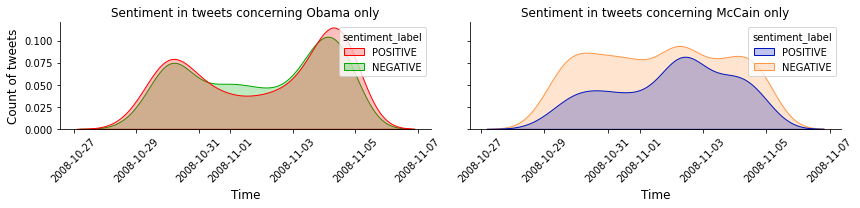

In [95]:
#kde plot
def plot_kde(ax, data, palette, title, legend=True):
    sns.kdeplot(
        data=data, 
        x="time", 
        hue="sentiment_label",
        hue_order=["POSITIVE", "NEGATIVE"],
        palette=palette,
        ax=ax,
        #multiple="stack",
        fill=True,
        legend=legend,
    )
    ax.set_title(title)
    #hide the right border and the top border so that it looks like a coordinate system
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.tick_params(axis='x', rotation=45)
    ax.set_xlabel("Time", fontsize=12,)
    ax.set_ylabel("Count of tweets", fontsize=12)

fig, axes = plt.subplots(1, 2, figsize=(12, 3), sharey=True)

plot_kde(
    axes[0], 
    dfObama, 
    [repred, repgreen],
    "Sentiment in tweets concerning Obama only",
)

plot_kde(
    axes[1], 
    dfMcCain, 
    [demblue, demorange],
    "Sentiment in tweets concerning McCain only",
)

fig.tight_layout()

In [96]:
#histogram
def plot_histogram(ax, data, palette, title, legend=True, hue="sentiment_label", hue_order=["POSITIVE", "NEGATIVE"]):
    sns.histplot(
        data=data, 
        x="time", 
        hue=hue,
        hue_order=hue_order,
        palette=palette,
        ax=ax,
        shrink=.6,
        edgecolor=None,
        multiple="stack",
        fill=True,
        legend=legend,
    )
    ax.set_title(title)
    #hide the right border and the top border so that it looks like a coordinate system
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.tick_params(axis='x', rotation=45,)
    ax.set_xlabel("Time", fontsize=12,)
    ax.set_ylabel("Count of tweets", fontsize=12)

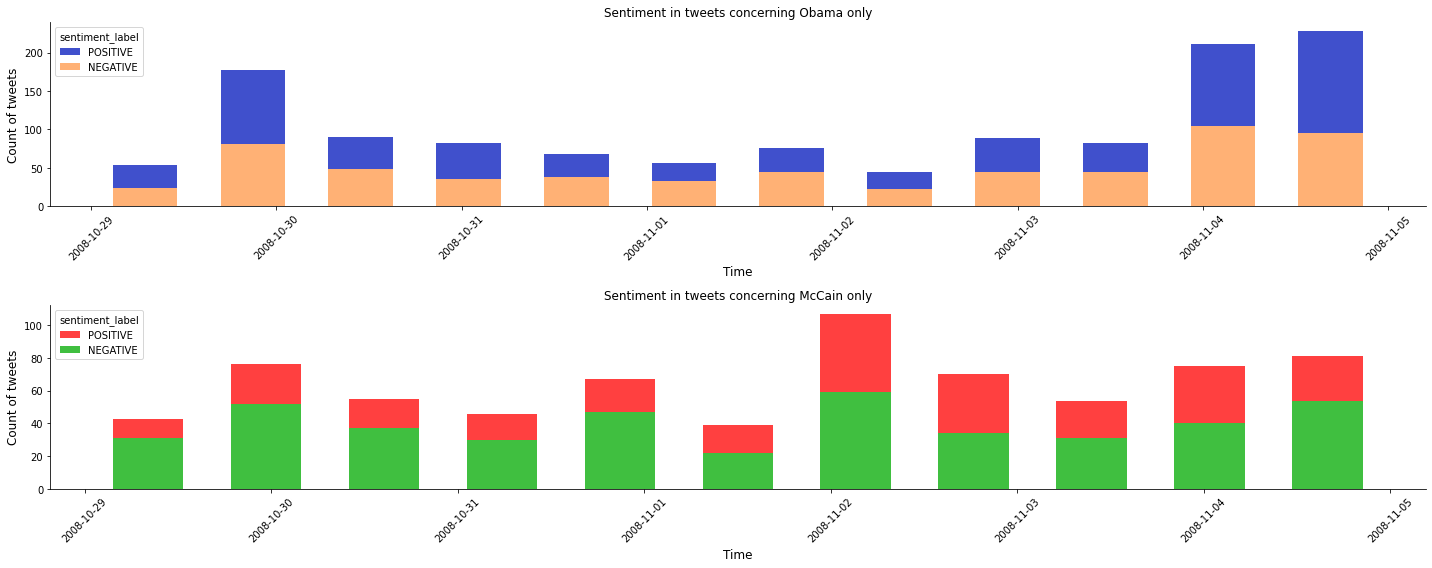

In [97]:
fig, axes = plt.subplots(2, 1, figsize=(20, 8))

plot_histogram(
    axes[0], 
    dfObama, 
    [demblue, demorange],
    "Sentiment in tweets concerning Obama only",
)

plot_histogram(
    axes[1], 
    dfMcCain, 
    [repred, repgreen],
    "Sentiment in tweets concerning McCain only",
)

fig.tight_layout()

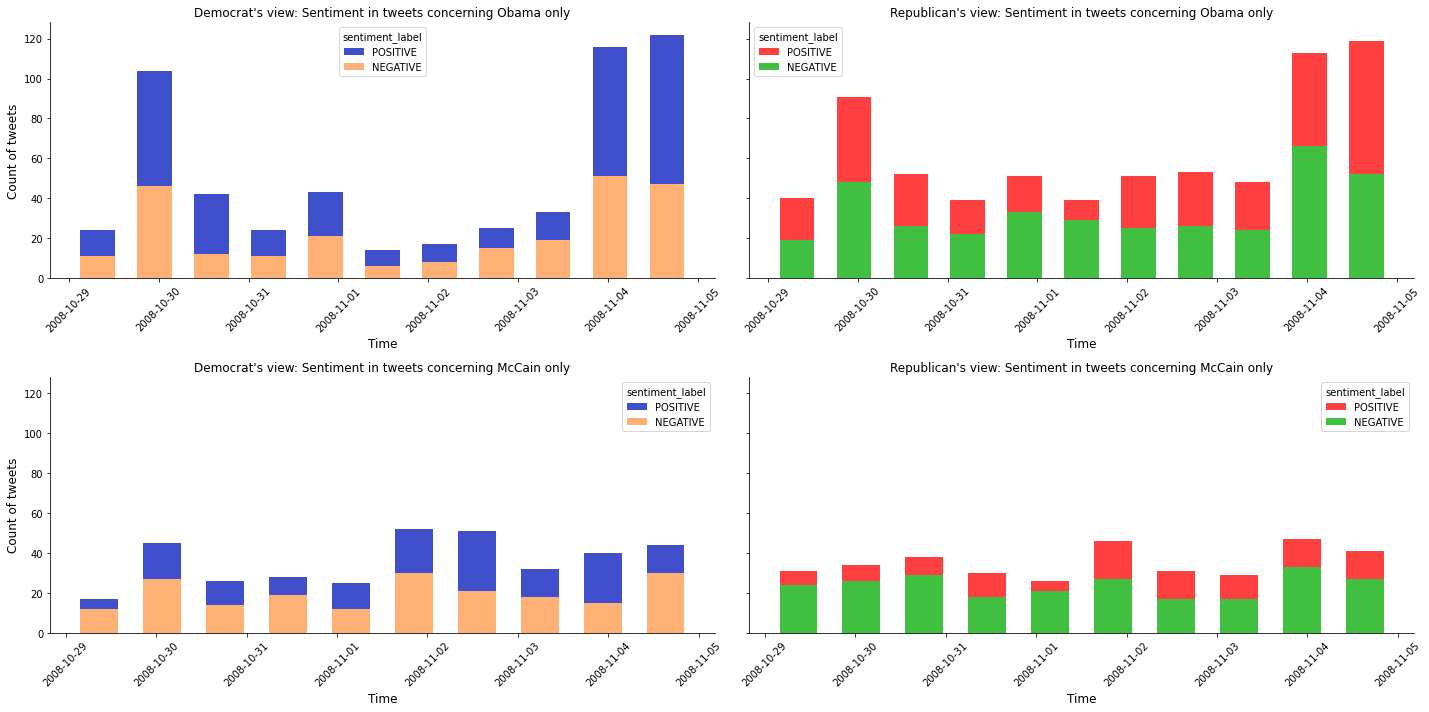

In [98]:
#histogram + political orientation
fig, axes = plt.subplots(2, 2, figsize=(20, 10),sharey=True)
plot_histogram(
    axes[0][0], 
    dfObama[dfObama["political_label"] == "Democrat"], 
    [demblue, demorange],
    "Democrat's view: Sentiment in tweets concerning Obama only",
)

plot_histogram(
    axes[0][1], 
    dfObama[dfObama["political_label"] == "Republican"], 
    [repred, repgreen],
    "Republican's view: Sentiment in tweets concerning Obama only",
    #legend=True
)

plot_histogram(
    axes[1][0], 
    dfMcCain[dfMcCain["political_label"] == "Democrat"], 
    [demblue, demorange],
    "Democrat's view: Sentiment in tweets concerning McCain only",
    legend=True
)

plot_histogram(
    axes[1][1], 
    dfMcCain[dfMcCain["political_label"] == "Republican"], 
    [repred, repgreen],
    "Republican's view: Sentiment in tweets concerning McCain only",
    legend=True
)


fig.tight_layout()

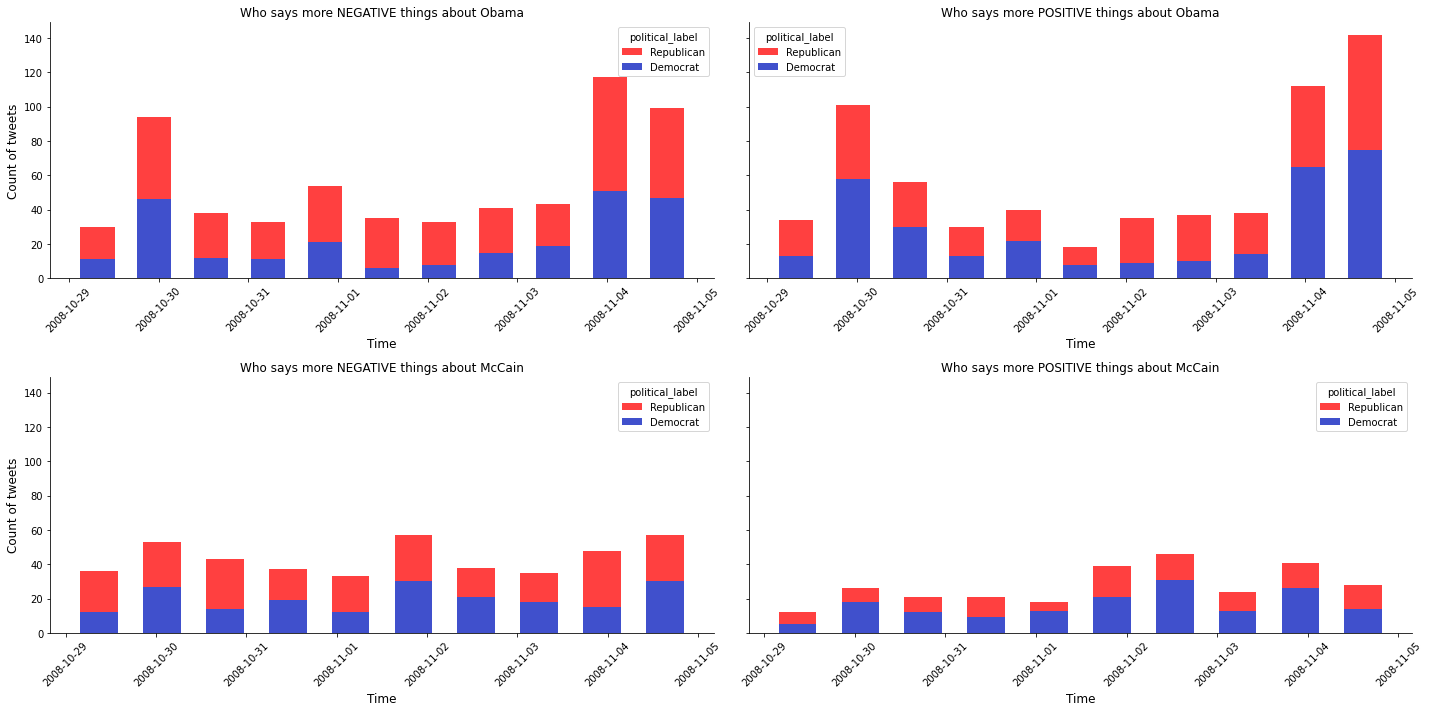

In [99]:
#histogram who dislike more Obama?
fig, axes = plt.subplots(2, 2, figsize=(20, 10),sharey=True)
plot_histogram(
    axes[0][0], 
    dfObama[dfObama["sentiment_label"] == "NEGATIVE"], 
    [repred, demblue],
    "Who says more NEGATIVE things about Obama",
    hue="political_label",
    hue_order=["Republican", "Democrat"]
)

plot_histogram(
    axes[0][1], 
    dfObama[dfObama["sentiment_label"] == "POSITIVE"], 
    [repred, demblue],
    "Who says more POSITIVE things about Obama",
    hue="political_label",
    hue_order=["Republican", "Democrat"]
    #legend=True
)

plot_histogram(
    axes[1][0], 
    dfMcCain[dfMcCain["sentiment_label"] == "NEGATIVE"], 
    [repred, demblue],
    "Who says more NEGATIVE things about McCain",
    legend=True,
    hue="political_label",
    hue_order=["Republican", "Democrat"]
)

plot_histogram(
    axes[1][1], 
    dfMcCain[dfMcCain["sentiment_label"] == "POSITIVE"], 
    [repred, demblue],
    "Who says more POSITIVE things about McCain",
    legend=True,
    hue="political_label",
    hue_order=["Republican", "Democrat"]
)


fig.tight_layout()


### merged from Federico

In [102]:
dfMcCain = pd.read_csv('/content/drive/MyDrive/McCain_twts_2008_classified_senti+poli.csv', parse_dates=['time'])
dfObama = pd.read_csv('/content/drive/MyDrive/Obama_twts_2008_classified_senti+poli.csv',  parse_dates=['time'])

In [103]:
# Convert sentiment to int format
dfObama['sentiment_label'] = dfObama['sentiment_label'].replace({'POSITIVE': 1, 'NEGATIVE': -1})
dfMcCain['sentiment_label'] = dfMcCain['sentiment_label'].replace({'POSITIVE': 1, 'NEGATIVE': -1})

In [104]:
#Average of sentiment values for each day
dfObamaDay = dfObama.groupby([dfObama['time'].dt.date]).mean()
dfMcCainDay = dfMcCain.groupby([dfMcCain['time'].dt.date]).mean()

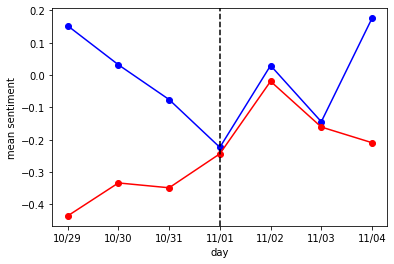

In [105]:
plt.plot(dfObamaDay.sentiment_label,'bo-')
plt.plot(dfMcCainDay.sentiment_label,'ro-')
plt.axvline(pd.Timestamp('2008-11-01'),color='k',linestyle='--')
plt.xlabel("day")
plt.ylabel("mean sentiment")
myFmt = mdates.DateFormatter('%m/%d')
plt.gca().xaxis.set_major_formatter(myFmt)

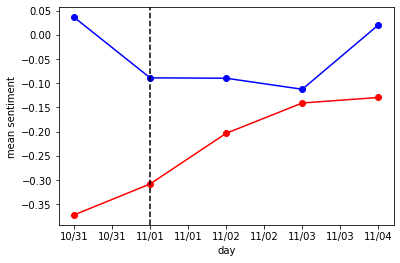

In [106]:
window_size = 3
plt.plot(dfObamaDay.sentiment_label.rolling(window_size).mean(),'bo-')
plt.plot(dfMcCainDay.sentiment_label.rolling(window_size).mean(),'ro-')
plt.axvline(pd.Timestamp('2008-11-01'),color='k',linestyle='--')
plt.xlabel("day")
plt.ylabel("mean sentiment")
myFmt = mdates.DateFormatter('%m/%d')
plt.gca().xaxis.set_major_formatter(myFmt)

([<matplotlib.axis.XTick at 0x7fc57a432a50>,
 [Text(0, 0, 'outgroup'), Text(0, 0, 'ingroup')])

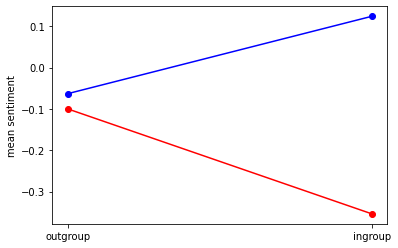

In [107]:
# Convert Orientation to int format
dfObama['political_label'] = dfObama['political_label'].replace({'Democrat': -1, 'Republican': 1})
dfMcCain['political_label'] = dfMcCain['political_label'].replace({'Democrat': -1, 'Republican': 1})

dfObamaDayDemRep = dfObama.groupby([dfObama['political_label']==-1]).mean()
dfMcCainDayDemRep = dfMcCain.groupby([dfMcCain['political_label']==1]).mean()
plt.plot(dfObamaDayDemRep.sentiment_label,'bo-')
plt.plot(dfMcCainDayDemRep.sentiment_label,'ro-')
plt.ylabel("mean sentiment")
plt.xticks([0,1],['outgroup','ingroup'])